# Projeto 1 - Ciência dos Dados

Nome: Antônio Amaral

Nome: Gabriel Penna

Nome: Caio Garcia

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
#Definindo Função Magica iPython
%matplotlib inline
#Importanto Pandas
import pandas as pd
#Importando MatPlotLib e Numpy
import matplotlib.pyplot as plt
import numpy as np
#Importando Sistema Operacional
import os
#Importando RE
import re

In [2]:
#Checando Diretório que será trabalhado:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/antonioamaralegydiomartins/Desktop/Antônio/GitHub - Pessoal/INSPER/CDados_Projeto1/Etapa 3 e 4 - Trabalho Finalizado


## Formulas Utilizadas:

In [3]:
def laplace (frase,tabela_rel, tabela_irrel,nao_repetentes,len_rel,len_irrel):
    #Definindo lista de probabilidades
    probR_list=[]
    probIr_list=[]
    #Separando a Frase em elementos
    splt = frase.split()
    #For para reconhecer a quantidade 
    for palavra in splt:
        if palavra not in tabela_rel:
            qtR = 1
        else:
            qtR = tabela_rel[palavra] + 1
        if palavra not in tabela_irrel:
            qtIr = 1
        else:
            qtIr = tabela_irrel[palavra] + 1
        #Definindo divisores
        div1 = len_rel + len(nao_repetentes)
        div2 = len_irrel + len(nao_repetentes)
        #CCalculo de Laplace
        probR_list.append(qtR/div1)
        probIr_list.append(qtIr/div2)
    return (probR_list,probIr_list)

def cleanup(texto):

    temp = texto.lower()

    temp = re.sub("@[A-Za-z0-9_]+","", temp)

    temp = re.sub("#[A-Za-z0-9_]+","", temp)

    temp = re.sub(r'http\S+', '', temp)

    temp = re.sub('[()!?ㅋ;:,/^~♂️*=&-]', ' ', temp)

    temp = re.sub('\[.*?\]',' ', temp)

    temp = re.sub("[z0-9]"," ", temp)

    temp = re.sub('\\\\\\\\n'," ", temp)

    temp = re.sub('\\\\'," ", temp)

    temp = re.sub('\ '," ", temp)
    
    temp = re.sub("é","e",temp)
    
    temp = re.sub("ã","a",temp)

    return temp

## Carregando Arquivos

In [4]:
#Definindo Arquivo que será trabalhado
filename = 'yakult-final_2.xlsx'

In [5]:
#Carregando Excel dentro da Variável Trainamento
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Classificação,Classificação 2
0,@colchoesueli a médica passou lactobacilos p...,1.0,2.0
1,alguém compra yakult pra mim por deus,0.0,3.0
2,"amanhã vou fazer aquele drink de morango, ...",0.0,2.0
3,tomando um yakult no meio da rua 💪,1.0,3.0
4,48 horas e estou sobrevivendo com;\\\\nmei...,1.0,1.0


In [6]:
#Carregando Excel dentro da Variável Teste
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Classificação,Classificação2
0,"@otavio_amaral18 é uma delícia juro, desce...",1,3
1,"o cérebro é muito impressionante, ontem eu...",1,4
2,@fenicolli02 quem q pede gole do yakult???...,0,0
3,@thamaramaia5 @adrianommartins @taaayrd @t...,0,2
4,sdds das mamis juntas brindando yakult @fe...,0,2


## Treinamento Naive-Bayles --- Classificador Automático de Sentimento

Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

O produto que foi escolhido para ser analizado foi o yakult, a famosa bebida fermentada japonesa, o grupo levou em consideração a emissão de opinião na hora de montar o seu classificador. Sendo assim se houve a emissão de uma uma opinião, sendo benéfica ou não, o Tweet é considerado relevante, porém se houver a emissão de uma opinião que não corresponde ao produto, ou não houve a emissão de uma opinião o Tweet é considerado irrelevante.

___
### - Definindo Relevância 

In [7]:
#Definindo quais são os Tweets com classificação Irrelevante, dentro da Sheet Treinamento
Irrelevantes=train.loc[train['Classificação']==0,'Treinamento']
Irrelevantes

1                alguém compra yakult pra mim por deus  
2          amanhã vou fazer aquele drink de morango, ...
5          @madrugatina sei que vc não bebe, então va...
6          meu lindo :( quero ver ele fazendo batida ...
7          nadei igual um desgraçado, agora comi bata...
                             ...                        
486        meu maior sonho atualmente é um yakult veg...
487         @sirielleina amiga e um com cor de yakult   
492        @bcamoezi esses dias comprei couve, alface...
495        ontem eu comi...\\\\npão na chapa\\\\nstak...
497        ontem eu cheguei de madrugada em casa e fi...
Name: Treinamento, Length: 289, dtype: object

In [8]:
#Definindo quais são os Tweets com classificação Relevante, dentro da Sheet Treinamento
Relevantes=train.loc[train['Classificação']==1,'Treinamento']
Relevantes

0        @colchoesueli a médica passou lactobacilos p...
3                    tomando um yakult no meio da rua 💪 
4          48 horas e estou sobrevivendo com;\\\\nmei...
14         minha sogra fala mais que a mulher do yaku...
15         última coisa q comeu — tomei um yakult de ...
                             ...                        
490        a garrafinha de yakult é mt pequena, mano,...
491          @caarolmario bebida de yakult com corote   
493        acabei de ingerir isso aqui, me disseram q...
494        bernardo aprendeu a tomar yakult de canudi...
496      bolo: red velvet ou chocolate\\\\ndoce: chee...
Name: Treinamento, Length: 209, dtype: object

___
### - Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

Criando variáveis e realizando limpeza:

In [9]:
#Definindo texto_relevante, como a junção de todos os Tweets relevantes
texto_relevante=' '.join(Relevantes)

In [10]:
#Definindo texto_irrelevante como a junção de todos os Tweets irrelevantes
texto_irrelevante=' '.join(Irrelevantes)

In [11]:
#Passando ambos os textos pela função Cleanup, e convertendo todas as letras para Lowercase
texto_limpo_relevante=cleanup(texto_relevante).lower()
texto_limpo_irrelevante=cleanup(texto_irrelevante).lower()

Convertendo as strings limpas em objetos do tipo pd.series:

In [12]:
palavras_relevantes = texto_limpo_relevante.split()
serie_rel = pd.Series(palavras_relevantes)

In [13]:
palavras_irrelevantes = texto_limpo_irrelevante.split()
serie_irrel = pd.Series(palavras_irrelevantes)

Tornando os objetos transformados acima em series relativas:

In [14]:
serie_irel = serie_rel.value_counts(True)

In [15]:
serie_rrel = serie_irrel.value_counts(True)

In [16]:
#Checando porcentagem das listas
print("Porcentagem de Irrelevantes: {0} e de Relevantes: {1}".format(serie_irel.sum(),serie_rrel.sum()))

Porcentagem de Irrelevantes: 1.0 e de Relevantes: 1.0


Montando serie com todas as palavras que aparecem em todos os Tweets:

In [17]:
tabela_rel = serie_rel.value_counts()

In [18]:
tabela_irrel = serie_irrel.value_counts()

In [19]:
tabela_rel_rel = serie_rel.value_counts(True)

In [20]:
tabela_rel_irrel = serie_irrel.value_counts(True)

In [21]:
#Somando Palavras Relevantes e Irrelevantes para criar um dicionário de palavras
todas = texto_limpo_relevante + texto_limpo_irrelevante
#Criando serie_total
total_palavras = todas.split()
serie_total = pd.Series(total_palavras)
#Criando a tabela total de palavras
tabela_total = serie_total.value_counts()

In [22]:
print("Procentagem da Tabela de Irrelevantes: {0} e de Relevantes: {1}".format(tabela_irrel.sum(),tabela_rel.sum()))

Procentagem da Tabela de Irrelevantes: 4257 e de Relevantes: 3195


Adicionando variáveis que representam a soma das tabelas irrel e rel:

In [23]:
RelPal = tabela_rel.sum()


In [24]:
IrrelPal = tabela_irrel.sum()

In [25]:
TotalPal = tabela_total.sum()

Descobrindo a Probabilidade de ser uma palavra Relevante e Irrelevante:

In [26]:

probI=IrrelPal/TotalPal
print("A probabilidade de uma palavra ser Irrelevante: {0}".format(probI))

A probabilidade de uma palavra ser Irrelevante: 0.571256038647343


In [27]:
probR=RelPal/TotalPal
print("A probabilidade de uma palavra ser Relevante: {0}".format(probR))

A probabilidade de uma palavra ser Relevante: 0.428743961352657


In [28]:
lista_tabela_total = serie_total.tolist()
nao_repetentes = set(lista_tabela_total)
nao_repetentes = pd.DataFrame(nao_repetentes)

In [29]:
Frase = "gosto muito estou viciado abri geladeira"
Frase = cleanup(Frase).lower()
Frase

'gosto muito estou viciado abri geladeira'

In [30]:
len_rel = len(tabela_rel)
len_irrel = len(tabela_irrel)

In [31]:
probfR = laplace(Frase, tabela_rel, tabela_irrel, nao_repetentes, len_rel, len_irrel)[0]
probfIr = laplace(Frase, tabela_rel, tabela_irrel, nao_repetentes, len_rel, len_irrel)[1]
 
pR = 1
pIr = 1

for e in range(len(probfR)):
    pR = pR * probfR[e]
    pIr = pIr * probfIr[e]

In [32]:
if pR > pIr:
    print("Relevante")
else:
    print("Irrelevante")

Relevante


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [33]:
list_prob = []
diver_rel = []
Tweets = []
for e in test["Teste"]:
    text_clean_test = cleanup(e).lower()
    Tweets.append(text_clean_test)
    
List_Relevancia = []
for Tweet in Tweets:
    probfR2 = laplace(Tweet, tabela_rel, tabela_irrel, nao_repetentes, len_rel, len_irrel)[0]
    probfIr2 = laplace(Tweet, tabela_rel, tabela_irrel, nao_repetentes, len_rel, len_irrel)[1]
    pR2 = 1
    pIr2 = 1
    for e in range(len(probfR2)):
        pR2 = pR2 * probfR2[e]
        pIr2 = pIr2 * probfIr2[e]
    if pR2 > pIr2:
        list_prob.append(pR2)
        List_Relevancia.append(1)
        val = pIr2/pR2
        if val > 0.6:
            diver_rel.append(4)
        elif val >0.3 and val <=0.6:
            diver_rel.append(3)
        elif val >0 and val <=0.3:
            diver_rel.append(2)
    else:
        list_prob.append(pIr2)
        List_Relevancia.append(0)
        val = pR2/pIr2
        if val > 0.6:
            diver_rel.append(0)
        elif val >0.3 and val <=0.6:
            diver_rel.append(1)
        elif val >0 and val <=0.3:
            diver_rel.append(2)
            
"""
Algo que extrema importância de citar é a variante "Val" criada para dividir ambas probabilidades
Conseguindo assim criar um fundamento para a separação dos Tweets por Multiplas Relevâncias.

O Val funciona de duas formas, sendo a primeira dela no caso de um Tweet ser considerado relevante,
neste caso val representa a divisão da probabilidade desse tweet ser irrelevante pela probabilidade
dele ser relevante, resultando em um número menor ou igual a 1 - mas nunca maior que 1.
A segunda forma é parecida, e acontece quando um tweet é Irrelevante, havendo a mudança de divisores
na divisão, para novamente a variavel não ultrapassar 1.

Sendo assim Val representa, no primeiro caso, uma variante de relevacia que vai de 0-1, e no segundo caso
uma variante de irrelevancia que vai de 0-1.
"""

test["Classificador"] = List_Relevancia
test["Probabilidade"] = list_prob
test["Multi_Classificação"] = diver_rel

Abaixo serão calculadas as porcentagens de verdadeiros/falsos positivos, e de verdadeiros/falsos negativos, junto com a acurácia. É importante resaltar que serão considerados relevancias de 0 e 1.

In [34]:
Ver_Pos = 0
Ver_Fal = 0
Fal_Pos = 0
Fal_Fal = 0
Classificação = []
total_clas = pd.Series(test["Classificação"])
for e in total_clas:
    Classificação.append(e)
for e in range(len(Classificação)):
    if Classificação[e] == 1:
        if Classificação[e] == List_Relevancia[e]:
            Ver_Pos+=1
        else:
            Ver_Fal+=1
    else:
        if Classificação[e] == List_Relevancia[e]:
            Fal_Pos+=1
        else:
            Fal_Fal+=1
Total = Ver_Pos+Ver_Fal+Fal_Pos+Fal_Fal
Total_Pos = Ver_Pos+Ver_Fal
Total_Fal = Fal_Pos+Fal_Fal
#Porcentagem de Verdadeiros Positivos
print("Porcentagem de Verdadeiros Positivos: {0:.2f}%".format((Ver_Pos/Total_Pos)*100))
#Porcentagem de Falsos Positivos
print("Porcentagem de Falsos Positivos: {0:.2f}%".format((Fal_Pos/Total_Fal)*100))
#Porcentagem de Verdadeiros Negativos
print("Porcentagem de Verdadeiros Negativos: {0:.2f}%".format((Ver_Fal/Total_Pos)*100))
#Porcentagem de Falsos Negativos
print("Porcentagem de Falsos Negativos: {0:.2f}%".format((Fal_Fal/Total_Fal)*100))
#Acurácia
print("Acurácia é de: {0:.2f}%".format((Ver_Pos+Fal_Pos)/Total*100))

Porcentagem de Verdadeiros Positivos: 33.77%
Porcentagem de Falsos Positivos: 77.11%
Porcentagem de Verdadeiros Negativos: 66.23%
Porcentagem de Falsos Negativos: 22.89%
Acurácia é de: 56.25%


Abaixo serão calculadas as porcentagens de verdadeiros/falsos positivos e de verdadeiros/falsos negativos, junto com a acurácia. É importante resaltar que serão consideradas todas as multiplas relevâncias (Muito Relevante, Relevante, Neutro, Irrelevante, Muito Irrelevante).

In [35]:
MRel_Pos = 0
MRel_Fal = 0

Rel_Pos = 0
Rel_Fal = 0

Neu_Pos = 0
Neu_Fal = 0

IRel_Pos = 0
IRel_Fal = 0

MIRel_Pos = 0
MIRel_Fal = 0

Classificação2 = []
total_clas = pd.Series(test["Classificação2"])
for e in total_clas:
    Classificação2.append(e)
for e in range(len(Classificação2)):
    if Classificação2[e] == 0:
        if Classificação2[e] == diver_rel[e]:
            MIRel_Pos+=1
        else:
            MIRel_Fal+=1
    elif Classificação2[e] == 1:
        if Classificação2[e] == diver_rel[e]:
            IRel_Pos+=1
        else:
            IRel_Fal+=1
    elif Classificação2[e] == 2:
        if Classificação2[e] == diver_rel[e]:
            Neu_Pos+=1
        else:
            Neu_Fal+=1
    elif Classificação2[e] == 3:
        if Classificação2[e] == diver_rel[e]:
            Rel_Pos+=1
        else:
            Rel_Fal+=1
    elif Classificação2[e] == 4:
        if Classificação2[e] == diver_rel[e]:
            MRel_Pos+=1
        else:
            MRel_Fal+=1
Total = MRel_Pos + MRel_Fal + Rel_Pos + Rel_Fal + Neu_Pos + Neu_Fal + IRel_Pos + IRel_Fal + MIRel_Pos + MIRel_Fal
T_MRel = MRel_Pos + MRel_Fal
T_Rel = Rel_Pos + Rel_Fal
T_Neu = Neu_Pos + Neu_Fal
T_IRel = IRel_Pos + IRel_Fal
T_MIRel = MIRel_Pos + MIRel_Fal

print("Porcentagens: ")
print("==============")
print("Muito Relevante")
print("Positivo: {0:.2f}%".format(MRel_Pos/T_MRel*100))
print("Negativo: {0:.2f}%".format(MRel_Fal/T_MRel*100))
print("====")
print("Relevante")
print("Positivo: {0:.2f}%".format(Rel_Pos/T_Rel*100))
print("Negativo: {0:.2f}%".format(Rel_Fal/T_Rel*100))
print("====")
print("Neutro")
print("Positivo: {0:.2f}%".format(Neu_Pos/T_Neu*100))
print("Negativo: {0:.2f}%".format(Neu_Fal/T_Neu*100))
print("====")
print("Irrelevante")
print("Positivo: {0:.2f}%".format(IRel_Pos/T_IRel*100))
print("Negativo: {0:.2f}%".format(IRel_Fal/T_IRel*100))
print("====")
print("Muito Irrelevante")
print("Positivo: {0:.2f}%".format(MIRel_Pos/T_MIRel*100))
print("Negativo: {0:.2f}%".format(MIRel_Pos/T_MIRel*100))
print("====")
print("Acurácia: {0:.2f}%".format((MRel_Pos+Rel_Pos+Neu_Pos+IRel_Pos+MIRel_Pos)/Total*100))

Porcentagens: 
Muito Relevante
Positivo: 23.08%
Negativo: 76.92%
====
Relevante
Positivo: 2.33%
Negativo: 97.67%
====
Neutro
Positivo: 80.49%
Negativo: 19.51%
====
Irrelevante
Positivo: 8.99%
Negativo: 91.01%
====
Muito Irrelevante
Positivo: 3.23%
Negativo: 3.23%
====
Acurácia: 25.31%


___
### Concluindo

#### Faça um comparativo qualitativo sobre os percentuais obtidos para que possa discutir a performance do seu classificador.

Com o nosso trabalho já concluido, foi possível começar a realizar as primeiras conclusões sobre o nosso classificador. Quando o colocamos para realizar uma tarefa mais fáceis, quando o tweet é ou não relevante, ele se mostrou bem eficiente, tendo um bom desempenho com mais de 56% de acurácia. Dentro desses dados o que mais se mostrou com destaque foi o de "Verdadeiros negativos", que com si traz uma porcentagem de aproximadamente 66%. Porém, o classificador demonstrou uma grande deficiencia quando se trata de tarefas mais complicadas, isso ficou evidente quando se observa a Acurácia de apenas 25% quando colocamos o mesmo para dividir e analizar os tweets em mais categorias. Com isso, podemos concluir que, o sistema programado por nós é eficiente, principalmente com os trabalhos de curta complexidade, a parte de maior complexidade em sua parte pode ter sido causada tanto por um erro humano na hora de analizarmos os tweets, quanto na estratégia utilizada para a realização dos calculos.

#### Explique como são tratadas as mensagens com dupla negação e sarcasmo.

O classificador utilizamos apresenta um problema na hora de identificar casos de dupla negação sarcasmo. Isso ocorre pois no sistema utilizado, todas as palavras são verificadas e contabilizadas, porém não é possível se descobrir a forma no qual foi dita. Isso faz com que em grande parte dos casos, as mensagens que contêm sarcasmo ou dupla negação, acabem por ser colocadas como “Relevantes”, pois tem uma estrutura semântica muito semelhante ao dos exemplos que fornecemos em nosso Dataframe.


#### Proponha um plano de expansão. Por que eles devem continuar financiando seu projeto?

Uma vez que conseguimos realizar tal projeto com um considerável nível de acerto utilizando apenas técnicas mais simples, com um maior tempo e recurso, seria possível utilização de táticas mais precisas, logo, aumentaria também o índice de acerto. Sendo assim, um financiamento maior em nosso projeto é uma garantia de uma ferramenta mais elaborada e precisa.  


#### Por que não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets?

Uma vez que construímos o nosso classificador, não é correto alimentar a nossa base de treinamento com o nosso próprio classificador, mas sim precisamos usar novos tweets. Isso ocorre, pois uma vez que utilizamos os mesmos, isso acabaria tendenciando o classificador, logo ele desvincularia de seu proposito original.


#### Propor diferentes cenários de uso para o classificador Naive-Bayes. Pense em outros cenários sem intersecção com este projeto.

Existem diversos usos possíveis para o uso desse tipo de classificador, o mais famoso é a divisão entre “spam” e “não spam” quando vemos nosso e-mail. Além desse caso, existem diversos outros ao qual podemos perceber o uso desse artificio, como por exemplo sugerir propagandas em plataformas como o youtube tendo em vista conteúdos consumidos anteriormente pelo usuário. Em casos mais complexos, pode inclusive ajudar na medicina, ao qual eles podem prever diversas doenças.


#### Sugerir e explicar melhorias reais no classificador com indicações concretas de como implementar (não é preciso codificar, mas indicar como fazer. Indique material de pesquisa sobre o assunto).

Nosso classificador é passível de diversas melhorias para conseguirmos resultados mais completos. Existem técnicas que poderiam nos ajudar, como por exemplo a remoção de stopwords, que consiste em retirar palavras que não adicionam nada em um contexto geral. Utilizar da lematização de palavras, ou seja, unir diversas flexões da mesma palavra, como no caso de “beber, bebe e bebeu”, com o intuito de aumentar o número de vezes que uma palavra aparece, tornando os cálculos mais precisos.

Outra melhoria que poderia ser realizado, seria o uso de uma ferramenta que propõe a substituição da combinação de dois ou mais atributos, pois assim ocorreria a discretização de valores, deixando o resultando com uma maior precisão.


#### Fontes:
- https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/
- https://www.cos.ufrj.br/~ines/enia07_html/pdf/28095.pdf

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [36]:
#Junta Duas pd.Series = Cria um Novo DataFrame
    #Embaralhar de Forma Aleatoria novo DataFrame
    #Pega Conjunto de 300 Primeiros e usa Como treinamento
    #Pega Conjunto de 200 Depois e Usa como Teste
    
#Criar Listas para guardar Dados (PositivosFalsoAcurácia)

Dados_PosPos = []
Dados_PosFal = []
Dados_FalPos = []
Dados_FalFal = []
Dados_Acurac = []

Lista_Total_Classificação = []
Lista_Total_Tweets = []
for e in train["Classificação"]:
    Lista_Total_Classificação.append(e)
for e in train["Treinamento"]:
    Lista_Total_Tweets.append(e)
for e in test["Classificação"]:
    Lista_Total_Classificação.append(e)
for e in test["Teste"]:
    Lista_Total_Tweets.append(e)
    
DataFrame = pd.DataFrame()
DataFrame["Tweets"] = Lista_Total_Tweets
DataFrame ["Classificação"] = Lista_Total_Classificação
DataFrame["Tweets"] = DataFrame["Tweets"].astype(object)
lista_ = []
for e in DataFrame["Tweets"]:
    lista_.append(cleanup(e))
DataFrame["Tweets"]=lista_

In [37]:
Lista_Verdadeiros_Positivos = []
Lista_Verdadeiros_Negativos = []
Lista_Falsos_Positivos = []
Lista_Falsos_Negativos = []
Lista_Acuracia = []

In [38]:
for ef in range(0,100):
    #Shuffle
    DataFrame_Shuffle = DataFrame.sample(frac=1)
    #Listas
    List_Prob3 = []
    List_Relevancia3 = []
    Treinamento_Tweets = (DataFrame_Shuffle["Tweets"].sample(n=500))
    Treinamento_Class =(DataFrame_Shuffle["Classificação"].sample(n=500))
    Teste_Tweets = (DataFrame_Shuffle["Tweets"].sample(n=318))
    Teste_Class = (DataFrame_Shuffle["Classificação"].sample(n=318))
    #DataFrame para treinamento
    DT = pd.DataFrame()
    DT["Tweets"] = Treinamento_Tweets
    DT["Classificação"] = Treinamento_Class
    Relevantes = DT.loc[DT["Classificação"]==1,"Tweets"]
    Texto_Relevantes = " ".join(Relevantes)
    IRelevantes = DT.loc[DT["Classificação"]==0,"Tweets"]
    Texto_IRelevantes = " ".join(IRelevantes)
        #Split()
    spl_Rel = Texto_Relevantes.split()
    spl_IRel = Texto_IRelevantes.split()
    Serie_Rel = pd.Series(spl_Rel)
    Serie_IRel = pd.Series(spl_IRel)
        #Criando Tabelas
    Tabela_Rel = Serie_Rel.value_counts()
    Tabela_Irrel = Serie_IRel.value_counts()
       #Criando Total
    Todas = spl_Rel+spl_IRel
    Serie_Total = pd.Series(Todas)
    Tabela_Total = Serie_Total.value_counts()
    Lista_Tabela_Total = Serie_Total.tolist()
    Nao_Repete = set(Lista_Tabela_Total)
    Nao_Repete = pd.DataFrame(Nao_Repete)
        #Definindo Len
    Len_Rel = len(tabela_rel)
    Len_Irrel = len(tabela_irrel)
    #DataFrame para Teste
    DT2 = pd.DataFrame()
    DT2["Tweets"] = Teste_Tweets
    DT2["Classifição"] = Teste_Class
        #LapLace
    for Tweets in Teste_Tweets:
        probfR3 = laplace (Tweets, Tabela_Rel, Tabela_Irrel, Nao_Repete, Len_Rel, Len_Irrel)[0]
        probfIr3 = laplace (Tweets, Tabela_Rel, Tabela_Irrel, Nao_Repete, Len_Rel, Len_Irrel)[1]
        pR3 = 1
        pIr3 = 1
        for e in range(len(probfR3)):
            pR3 = pR3 * probfR3[e]
            pIr3 = pIr3 * probfIr3[e]
        if pR3 > pIr3:
            List_Prob3.append(pR3)
            List_Relevancia3.append(1)
        else:
            List_Prob3.append(pIr3)
            List_Relevancia3.append(0)
    Ver_Pos3 = 0
    Ver_Fal3 = 0
    Fal_Pos3 = 0
    Fal_Fal3 = 0
    Classificação3 = []
    total_clas3 = pd.Series(DT2["Classifição"])
    for e in total_clas3:
        Classificação3.append(e)
    for e in range(len(Classificação3)):
        if Classificação3[e] == 1:
            if Classificação3[e] == List_Relevancia3[e]:
                Ver_Pos3+=1
            else:
                Ver_Fal3+=1
        else:
            if Classificação3[e] == List_Relevancia3[e]:
                Fal_Pos3+=1
            else:
                Fal_Fal3+=1
    Total3 = Ver_Pos3+Ver_Fal3+Fal_Pos3+Fal_Fal3
    Total_Pos3 = Ver_Pos3+Ver_Fal3
    Total_Fal3 = Fal_Pos3+Fal_Fal3
    Lista_Verdadeiros_Positivos.append(Ver_Pos3/Total_Pos3*100)
    Lista_Verdadeiros_Negativos.append(Fal_Pos3/Total_Fal3*100)
    Lista_Falsos_Positivos.append(Ver_Fal3/Total_Pos3*100)
    Lista_Falsos_Negativos.append(Fal_Fal3/Total_Fal3*100)
    Lista_Acuracia.append((Ver_Pos3+Fal_Pos3)/Total3*100)

Text(0, 0.5, 'Densidade')

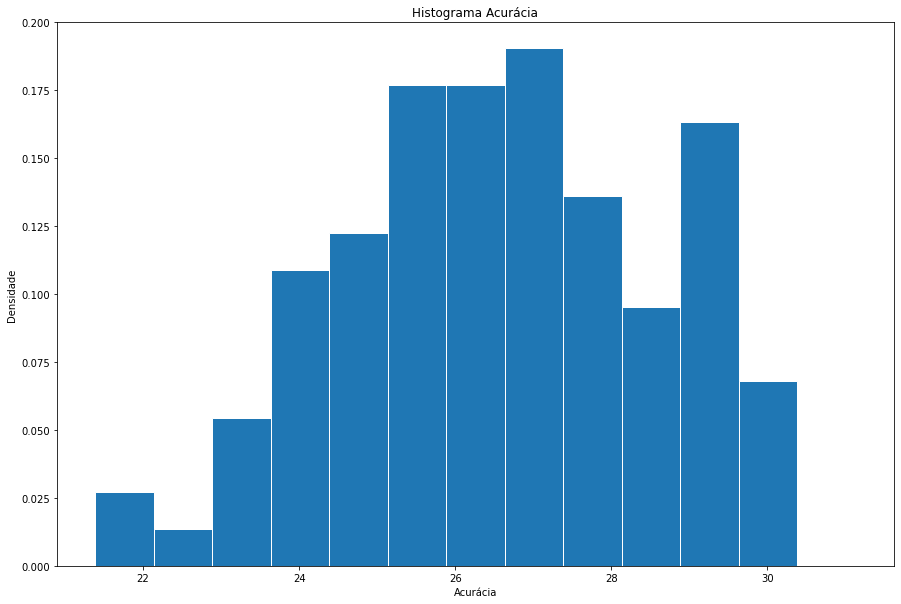

In [39]:
faixa = np.arange(min(Lista_Acuracia),max(Lista_Acuracia),0.75)
plt.figure(figsize = (15,10))
plt.hist (Lista_Acuracia,bins = faixa, edgecolor="white", density=True)
plt.title ("Histograma Acurácia")
plt.xlabel ("Acurácia")
plt.ylabel ("Densidade")

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

https://www.cos.ufrj.br/~ines/enia07_html/pdf/28095.pdf